In [2]:
pip install MTCNN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 30.4 MB/s eta 0:00:00


In [3]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from mtcnn import MTCNN
import imutils
from imutils import face_utils
import matplotlib.pyplot as plt
import numpy as np
import cv2
import dlib
detector = MTCNN()
import os

In [4]:
class FaceAligner:
    #modify the box size with changing the values for desiredLeftEye
    def __init__(self, desiredLeftEye=(0.30, 0.30),
        desiredFaceWidth=224, desiredFaceHeight=None):
        # store the facial landmark predictor, desired output left
        # eye position, and desired output face width + height
        self.desiredLeftEye = desiredLeftEye
        self.desiredFaceWidth = desiredFaceWidth
        self.desiredFaceHeight = desiredFaceHeight
        # if the desired face height is None, set it to be the
        # desired face width (normal behavior)
        if self.desiredFaceHeight is None:
            self.desiredFaceHeight = self.desiredFaceWidth
    def align(self, image, left_eye, right_eye):
        
        # compute the angle between the eye centroids
        dY = right_eye[1] - left_eye[1]
        dX = right_eye[0] - left_eye[0]
        angle = np.degrees(np.arctan2(dY, dX))
        
        #compute the desired right eye x-coordinate based on the
        # desired x-coordinate of the left eye
        desiredRightEyeX = 1.0 - self.desiredLeftEye[0]
        
        # determine the scale of the new resulting image by taking
        # the ratio of the distance between eyes in the *current*
        # image to the ratio of distance between eyes in the
        # *desired* image
        dist = np.sqrt((dX ** 2) + (dY ** 2))
        desiredDist = (desiredRightEyeX - self.desiredLeftEye[0])
        desiredDist *= self.desiredFaceWidth
        scale = desiredDist / dist
        
        # compute center (x, y)-coordinates (i.e., the median point)
        # between the two eyes in the input image
        eyesCenter = (int((left_eye[0] + right_eye[0]) // 2),
                      int((left_eye[1] + right_eye[1]) // 2))
        # grab the rotation matrix for rotating and scaling the face
        #print(eyesCenter,angle,scale)
        M = cv2.getRotationMatrix2D(eyesCenter, angle, scale)
        # update the translation component of the matrix
        tX = self.desiredFaceWidth * 0.5
        tY = self.desiredFaceHeight * self.desiredLeftEye[1]
        M[0, 2] += (tX - eyesCenter[0])
        M[1, 2] += (tY - eyesCenter[1])
        
        # apply the affine transformation
        (w, h) = (self.desiredFaceWidth, self.desiredFaceHeight)
        output = cv2.warpAffine(image, M, (w, h),flags=cv2.INTER_CUBIC)
        # return the aligned face
        return output

In [5]:
def detect_face(img_path):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    conv_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_detect = dlib.get_frontal_face_detector()
    dect = face_detect(conv_gray,1)
    print("The number of faces in the image are :", len(dect),"\nCoordinates of top left and right bottom corner ",dect)
   
    
    for (i, dect) in enumerate(dect):
        (x, y, w, h) = face_utils.rect_to_bb(dect)
        cv2.rectangle(image, (x, y), (x + w, y + h), (210,210,0), 6)

    
    plt.imshow(image)
    plt.show()
    print("_________________________________________________________")
    

In [6]:
def detect_face1(img):
    pixels = pyplot.imread(img)
    
    faces = detector.detect_faces(pixels)
    #print(faces)
    return faces

In [7]:
img = 'group.jpg'


Original face


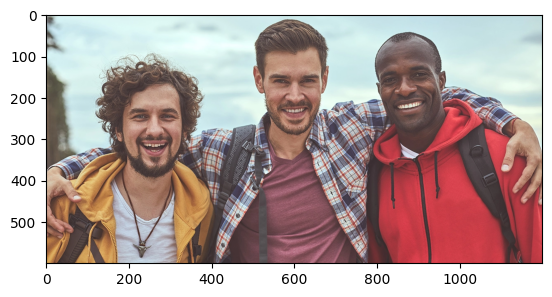

1/1 [==============================] - 0s 19ms/step
The number of faces in the image are : 3 
Coordinates of top left and right bottom corner  rectangles[[(184, 202) (339, 356)], [(528, 116) (683, 270)], [(786, 116) (941, 270)]]


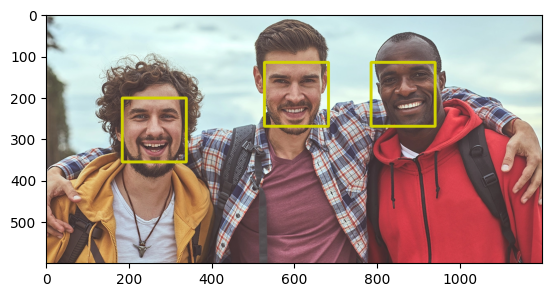

_________________________________________________________
Aligned face: 1, Accuracy: 100.000


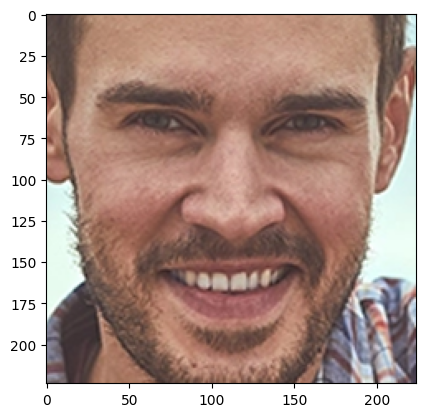

Aligned face: 2, Accuracy: 99.999


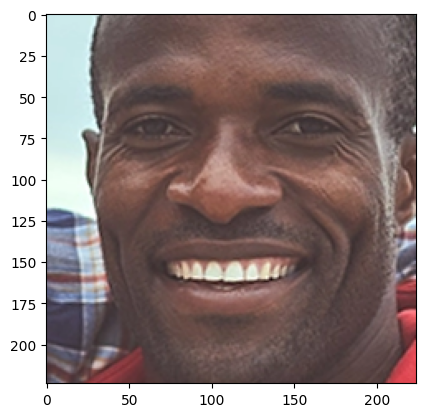

Aligned face: 3, Accuracy: 99.975


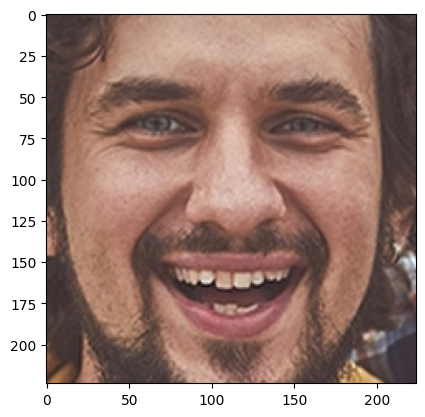

In [22]:
fa = FaceAligner(desiredFaceWidth=224)  # Calling the FaceAligner function
original_img= cv2.imread(img)           # Reads the image
print("Original face")                  
plt.imshow(original_img[:, :, ::-1])    # Displays the image
plt.show()                              

!mkdir Faces1
faces = detect_face1(img)                # Calls the function to display image
detect_face(img)

if len(faces)>0:                        # Calculates the number of faces
      i=0
      #print(faces)
      for face in faces:
            aligned_img = fa.align(cv2.imread(img), face['keypoints']['left_eye'], face['keypoints']['right_eye'])
            
            print("Aligned face: {}, Accuracy: {:.3f}".format(i+1, face['confidence']*100))
            plt.imshow(aligned_img[:, :, ::-1])
            plt.show()
            image_name = 'image'+str(i+1)+'.jpg'
            image_path = os.path.join('/content/Faces1',image_name)
            cv2.imwrite(image_path,aligned_img[:, :, ::-1])
            i+=1

          


In [9]:
pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=02e02201992ce9337c71fb7b1855dde1eef0fc117c360df10c1853c18c96bfac
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [23]:
from imutils import paths
import face_recognition
import pickle
import cv2
import os
 

#get paths of each file in folder named Images
#Images here contains my data(folders of various persons)
imagePaths = list(paths.list_images('Faces1'))
knownEncodings = []
knownNames = []
print(imagePaths)
# loop over the image paths
for imagePath in imagePaths:
    # extract the person name from the image path
    name = imagePath.split('/')[-1]
    # load the input image and convert it from BGR (OpenCV ordering)
    # to dlib ordering (RGB)
    image = cv2.imread(imagePath)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #Use Face_recognition to locate faces
    boxes = face_recognition.face_locations(rgb,model='hog')
    # compute the facial embedding for the face
    encodings = face_recognition.face_encodings(rgb, boxes)
    # loop over the encodings
    for encoding in encodings:
        knownEncodings.append(encoding)
        knownNames.append(name)
#save emcodings along with their names in dictionary data
    data = {"encodings": knownEncodings, "names": knownNames}
#use pickle to save data into a file for later use
print(data)
# f = open("face_enc", "wb")
# f.write(pickle.dumps(data))
# f.close()
data

['Faces1/image1.jpg', 'Faces1/image2.jpg', 'Faces1/image3.jpg']
{'encodings': [array([-0.0900889 ,  0.19976044, -0.01876774, -0.04925037, -0.15126738,
       -0.00493962, -0.09877633, -0.08589137,  0.15415859,  0.03698025,
        0.24618262,  0.0166432 , -0.25512534, -0.01960975, -0.07722276,
        0.09379147, -0.14637826, -0.09853869, -0.06887032, -0.1516114 ,
        0.0671959 ,  0.07046317, -0.04438781,  0.11876211, -0.08898278,
       -0.26042235, -0.0321587 , -0.06636888,  0.07197682, -0.23471799,
       -0.04127954,  0.03556887, -0.16124149, -0.0977219 ,  0.02067589,
        0.05013889, -0.10387816, -0.17972712,  0.183507  ,  0.00038883,
       -0.01446671,  0.0008792 ,  0.0895834 ,  0.32224178,  0.22260967,
        0.05011281,  0.01859409, -0.0148986 ,  0.14814922, -0.19302233,
        0.05821161,  0.19193444,  0.1004179 ,  0.10184723,  0.07834598,
       -0.24313153, -0.04856512,  0.12594484, -0.11164343,  0.03761521,
        0.00568414, -0.06016284, -0.04836665, -0.1843397 

{'encodings': [array([-0.0900889 ,  0.19976044, -0.01876774, -0.04925037, -0.15126738,
         -0.00493962, -0.09877633, -0.08589137,  0.15415859,  0.03698025,
          0.24618262,  0.0166432 , -0.25512534, -0.01960975, -0.07722276,
          0.09379147, -0.14637826, -0.09853869, -0.06887032, -0.1516114 ,
          0.0671959 ,  0.07046317, -0.04438781,  0.11876211, -0.08898278,
         -0.26042235, -0.0321587 , -0.06636888,  0.07197682, -0.23471799,
         -0.04127954,  0.03556887, -0.16124149, -0.0977219 ,  0.02067589,
          0.05013889, -0.10387816, -0.17972712,  0.183507  ,  0.00038883,
         -0.01446671,  0.0008792 ,  0.0895834 ,  0.32224178,  0.22260967,
          0.05011281,  0.01859409, -0.0148986 ,  0.14814922, -0.19302233,
          0.05821161,  0.19193444,  0.1004179 ,  0.10184723,  0.07834598,
         -0.24313153, -0.04856512,  0.12594484, -0.11164343,  0.03761521,
          0.00568414, -0.06016284, -0.04836665, -0.1843397 ,  0.22302322,
          0.06870455, -0.

In [24]:
 # Dimension of extracted data
for i in range(0,len(faces)):
  print(data["encodings"][i].shape)


(128,)
(128,)
(128,)


* Total 128 dimensions extracted in embedding of an image.